In [112]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection

In [113]:
data = pd.read_csv('../preprocessed_data.csv', index_col=0)

In [114]:
data.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,...,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,DEATH,CLM_ADMSN_DT,Y,fst_admsn_dt
0,00000B48BCF4AD29,19230901,NaN,2,5,10,260,2,1,2,...,2,2,2,600.0,30.0,0.0,0,20080707.0,0,NaN
1,00000B48BCF4AD29,19230901,NaN,2,5,10,260,2,1,2,...,2,2,2,600.0,30.0,0.0,0,20080724.0,0,NaN
2,00000B48BCF4AD29,19230901,NaN,2,5,10,260,2,1,2,...,2,2,2,600.0,30.0,0.0,0,20080805.0,0,NaN
3,0000525AB30E4DEF,19201001,NaN,2,1,31,300,2,2,2,...,2,2,2,240.0,190.0,0.0,0,20080525.0,0,NaN
4,0000525AB30E4DEF,19201001,NaN,2,1,31,300,2,2,2,...,2,2,2,240.0,190.0,0.0,0,20080918.0,0,NaN


In [115]:
working_data = data.drop_duplicates(['DESYNPUF_ID'])

In [116]:
#prevent data leakage
working_data = working_data.drop(['DESYNPUF_ID','CLM_ADMSN_DT', 'fst_admsn_dt', 'MEDREIMB_OP', 'BENRES_OP', 'PPPYMT_OP', 
                         'BENE_DEATH_DT', 'DEATH'], axis=1)

In [117]:
working_data.describe()

,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Y
count,1.128450e+05,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000,112845.000000
mean,1.936439e+07,1.557251,1.283708,25.725048,366.079268,1.831929,1.742124,1.861403,1.948212,1.910904,1.821188,1.708760,1.623918,1.868900,1.902849,1.973530,0.072382
std,1.258994e+05,0.496714,0.753121,15.519775,266.004435,0.373931,0.437467,0.345527,0.221599,0.284883,0.383196,0.454336,0.484403,0.337511,0.296165,0.160529,0.259121
min,1.909010e+07,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.928110e+07,1.000000,1.000000,11.000000,141.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
50%,1.936060e+07,2.000000,1.000000,25.000000,330.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,1.942030e+07,2.000000,1.000000,39.000000,551.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,1.983120e+07,2.000000,5.000000,54.000000,999.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


Variable descriptions:

Sex_Ident: 1 = Male, 2= Female
Race: 1 = White, 2 = Black, 3 = Others, 4 = Hispanic
Binary variables: 1 = Yes, 2 = No 


/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


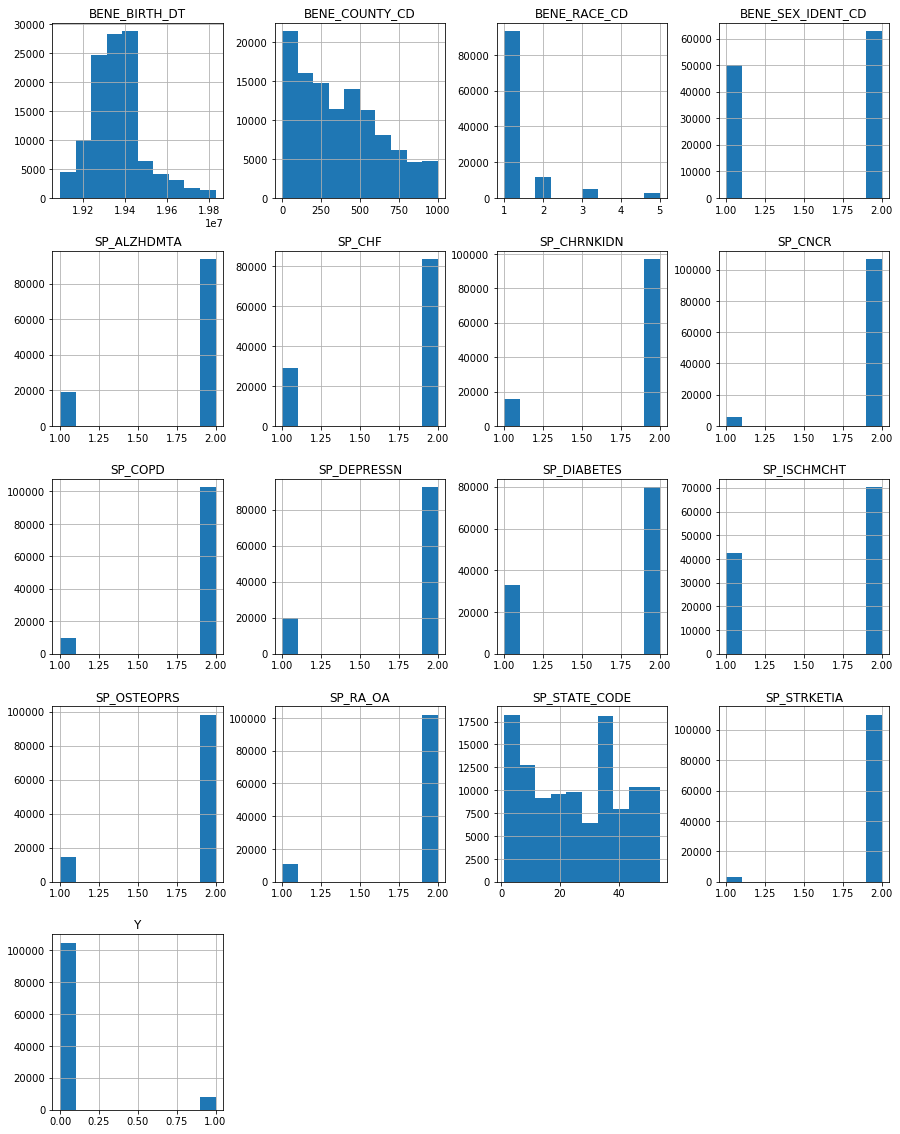

In [118]:
#Plot histograms of all features
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
working_data.hist(ax = ax)
plt.show()

In [119]:
c_mat = working_data.corr()
print(c_mat['Y'].sort_values(ascending=False))

Y                    1.000000
BENE_SEX_IDENT_CD    0.008494
BENE_COUNTY_CD       0.006995
SP_STATE_CODE        0.002646
BENE_BIRTH_DT       -0.001851
BENE_RACE_CD        -0.011004
SP_OSTEOPRS         -0.070542
SP_RA_OA            -0.071879
SP_CNCR             -0.081486
SP_DEPRESSN         -0.095626
SP_STRKETIA         -0.098594
SP_ALZHDMTA         -0.110317
SP_CHF              -0.147727
SP_COPD             -0.162696
SP_ISCHMCHT         -0.163241
SP_DIABETES         -0.165312
SP_CHRNKIDN         -0.207451
Name: Y, dtype: float64


Because our features show 2 for not having the disease, the correlations revealed a positive linear relationship between the patient having kidney disease and hospitalization (22%). Other strongest factors were diabetes (18%), ischemic heart disease (17%), and heart failure (16%). 

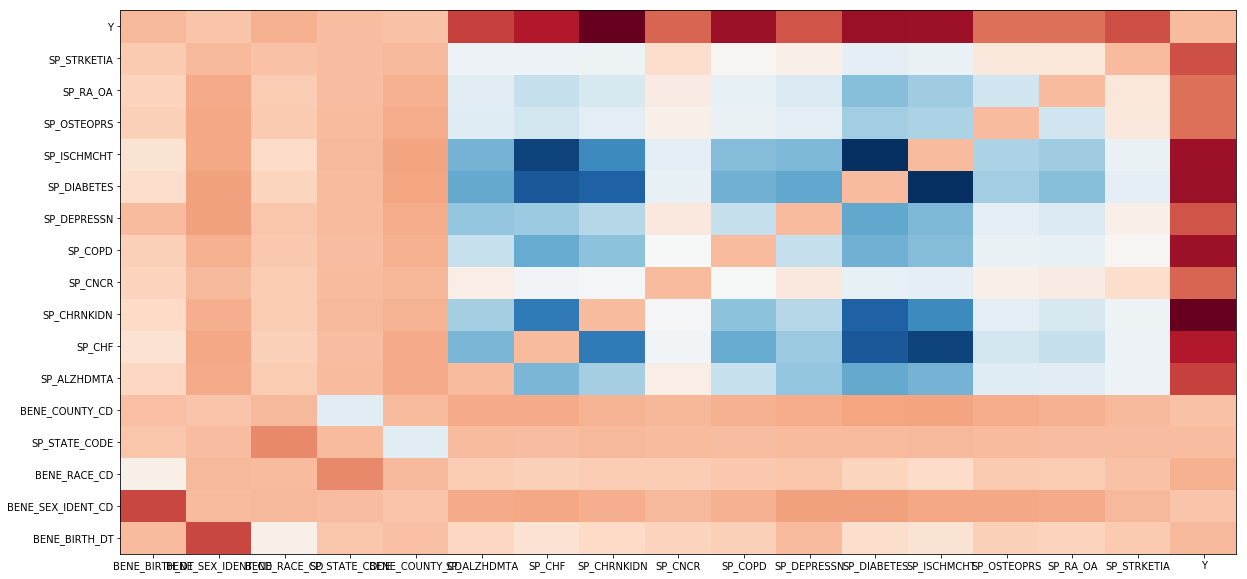

In [120]:
#Visualize correlations. Red signifies the strongest negative correlations

for i in range(c_mat.shape[0]):
    c_mat.iloc[i,i] = 0
 
    
fig, ax = plt.subplots(figsize = (20,10))
heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)

#Set the tick labels and center them
ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
ax.set_xticklabels(c_mat.index.values, minor=False)
ax.set_yticklabels(c_mat.index.values, minor=False)

heatmap.set_label('Pearson Correlation')

plt.show()

In [121]:
#Split dataset into testing and training

test, train = model_selection.train_test_split(working_data)

train_Y = train.pop('Y')
train_X = train

test_Y = test.pop('Y')
test_X = test


In [122]:
#Base Rate: predicting negative all the time
share_non_target = working_data[working_data.Y == 0].shape[0]/working_data.shape[0]

base_rate = share_non_target

print('Base rate of forecast represented by always predicting not being hospitalized is: ', str(base_rate))

Base rate of forecast represented by always predicting not being hospitalized is:  0.927617528468253


In [123]:
#Let's test features with a decision tree

from sklearn import tree

#Create a Decision Tree instance
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Train decision tree
clf.fit(train_X, train_Y)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [124]:
labels = working_data.columns[:-1]
labels

Index(['BENE_BIRTH_DT', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE',
       'BENE_COUNTY_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA'],
      dtype='object')

[ 0.28096534  0.03125126  0.02801067  0.15663221  0.20234934  0.02099583
  0.01454577  0.06625397  0.01736522  0.02351731  0.02513202  0.03659679
  0.03899794  0.01926979  0.02300084  0.0151157 ]


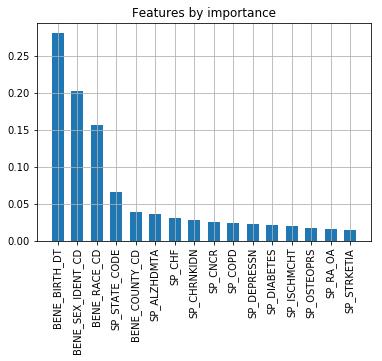

In [125]:
#Visualize feature importance
import matplotlib.pyplot as plt
%matplotlib inline

importances = clf.feature_importances_
#print(len(importances))

labels = working_data.columns[:-1]

assert(len(importances) == len(labels))

print(importances)

#Sort and order importances in descending order
importances.sort()
importances = importances[::-1]

N = len(importances)
xx = np.linspace(0, 1, N)
plt.bar(xx, importances, width=1/N/1.5)
plt.xticks(xx, labels, rotation='vertical')
plt.title('Features by importance')
plt.grid(True)

Use a simple Decision Tree as a base model to improve upon.

In [130]:
from sklearn import metrics

#Predicting train_df
fcst_train = clf.predict(train_X)

#Predicting test_df
fcst_test = clf.predict(test_X)

train_accuracy = clf.score(train_X, train_Y)
test_accuracy = clf.score(test_X, test_Y)

train_recall = metrics.recall_score(train_Y, fcst_train)
test_recall = metrics.recall_score(test_Y, fcst_test)

train_precision = metrics.precision_score(train_Y, fcst_train)
test_precision = metrics.precision_score(test_Y, fcst_test)

test_auc = metrics.roc_auc_score(test_Y, clf.predict_proba(test_X)[:,1])

print('Train accuracy:',train_accuracy, '\nTest accuracy:', test_accuracy, '\nDifference:', 
     train_accuracy - test_accuracy)

print('Train recall: ', train_recall, '\nTest recall: ', test_recall, '\nDifference: ', train_recall-test_recall)

print('\nTrain precision:',train_precision, '\nTest precision:', test_precision, '\nDifference:', 
     train_precision - test_precision)

print('\nTest AUC: ', test_auc)

Train accuracy: 0.99996455409 
Test accuracy: 0.872815568395 
Difference: 0.127148985695
Train recall:  0.999508599509 
Test recall:  0.158812978966 
Difference:  0.840695620542

Train precision: 1.0 
Test precision: 0.148046815625 
Difference: 0.851953184375

Test AUC:  0.543700494661


In [ ]:
#Tune the decision tree by testing hyperparameters
min_samples_split_values = np.linspace(200, 1000, 10, dtype = int)
min_samples_leaf_values = np.linspace(50, 200, 10, dtype = int)

In [ ]:
import matplotlib.pyplot as plt

for leaf in min_samples_leaf_values:
    accuracy = []
    
    for split in min_samples_split_values:
        
        clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = split, min_samples_leaf = leaf)
        
        clf.fit(train_X, train_Y)
        
        fcst_tests = clf.predict(test_X)
        
        accuracy.append(metrics.accuracy_score(test_Y, fcst_tests))
 
    plt.plot(min_samples_split_values, accuracy, label = str(leaf) + ' min leaf')
    plt.xlabel('min_samples_split')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")

In [ ]:
index_max_accuracy = accuracy.index(max(accuracy))

best_samples_split = min_samples_split_values[index_max_accuracy]
best_min_leaf = min_samples_leaf_values[index_max_accuracy]
best_accuracy = accuracy[index_max_accuracy]

print('Best Min Samples Split: ' + str(best_samples_split) + '\nBest Min Leaf: ' + str(best_min_leaf) 
      + '\nBest Accuracy: ' + str(best_accuracy))

In [ ]:
#We didn't beat the base rate
print('{0:.5f}'.format((base_rate - best_accuracy)))

#### Conclusion

Conclusion: I analyzed demographics and health features for predicting hospitalization in the next 6 months. 
Correlation analysis revealed the strongest positive linear relationship between the patient having kidney disease and hospitalization (22%). Other strongest factors were diabetes (18%), ischemic heart disease (17%), and heart failure (16%). 

Decision tree analysis uncovered the strongest non-linear relationships with such factors as Age, Gender, and Race.

We defined the base rate to be the share of all patients who weren't hospitalized in the next 6 months. The base rate is very high at around 90%. The decision tree could not outperform the base rate implying we need a different model and probably more inputs. 

Next I will look into inputs varying over time such as hospital visits and medication intake in the 6 months prior to hospitalization.